In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
classification_report,
confusion_matrix,
roc_auc_score,
roc_curve
)

In [2]:
# Set display options for clarity
pd.set_option('display.max_columns', None)
# Load the dataset
df = pd.read_csv("netflix_customer_churn.csv")
print("Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
print("\nPreview of dataset:")
display(df.head())

Dataset Loaded Successfully!
Shape of dataset: (5000, 14)

Preview of dataset:


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [3]:
print(" Basic Information about the dataset:")
print(df.info())
print("\n Checking Missing Values:")
print(df.isnull().sum())
print("\n Target Column Distribution (Churned):")
print(df['churned'].value_counts(normalize=True))
# Drop unnecessary columns
df = df.drop(columns=['customer_id'], errors='ignore')
print("\n Columns after dropping 'customer_id':")
print(df.columns.tolist())

 Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes:

In [4]:
X = df.drop('churned', axis=1)
y = df['churned']
print(" Feature Matrix (X) and Target (y) created successfully.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

 Feature Matrix (X) and Target (y) created successfully.
Shape of X: (5000, 12)
Shape of y: (5000,)


In [5]:
# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)
print(" Data Split Completed!")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print("Training Target Distribution:\n",
y_train.value_counts(normalize=True))
print("Testing Target Distribution:\n",
y_test.value_counts(normalize=True))

 Data Split Completed!
Training Set Shape: (4000, 12)
Testing Set Shape: (1000, 12)
Training Target Distribution:
 churned
1    0.503
0    0.497
Name: proportion, dtype: float64
Testing Target Distribution:
 churned
1    0.503
0    0.497
Name: proportion, dtype: float64


In [6]:
numeric_features = [
'age', 'watch_hours', 'last_login_days',
'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day'
]
categorical_features = [
'gender', 'subscription_type', 'region',
'device', 'payment_method', 'favorite_genre'
]
print(" Numeric Columns:", numeric_features)
print(" Categorical Columns:", categorical_features)

 Numeric Columns: ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']
 Categorical Columns: ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']


In [7]:
# Numeric Transformer
numeric_transformer = Pipeline(steps=[
('scaler', StandardScaler())
])
# Categorical Transformer
categorical_transformer = Pipeline(steps=[
('onehot', OneHotEncoder(handle_unknown='ignore'))
])
# Combine into a single preprocessor
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)
]
)
print(" Preprocessor Created Successfully!")

 Preprocessor Created Successfully!


In [8]:
model = Pipeline(steps=[
('preprocessor', preprocessor),
('classifier', LogisticRegression(max_iter=1000))
])
print(" Modeling Pipeline Ready!")

 Modeling Pipeline Ready!


In [9]:
model.fit(X_train, y_train)
print(" Model Training Completed Successfully!")

 Model Training Completed Successfully!


In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print(" Predictions Generated!")
print("Sample Predictions:", y_pred[:10])
print("Sample Probabilities:", y_prob[:10])

 Predictions Generated!
Sample Predictions: [0 1 1 1 1 1 1 1 0 1]
Sample Probabilities: [1.04414812e-04 9.85054124e-01 8.45789508e-01 9.87866921e-01
 9.89043330e-01 9.87965982e-01 9.56532151e-01 9.99981971e-01
 3.56867630e-01 8.55286555e-01]


In [11]:
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       497
           1       0.88      0.90      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000




=== Confusion Matrix ===


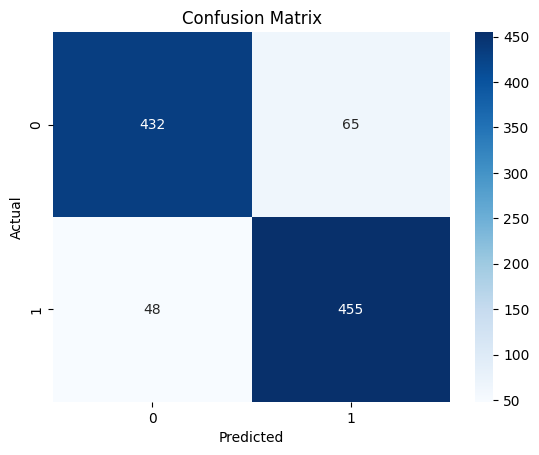

In [12]:
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

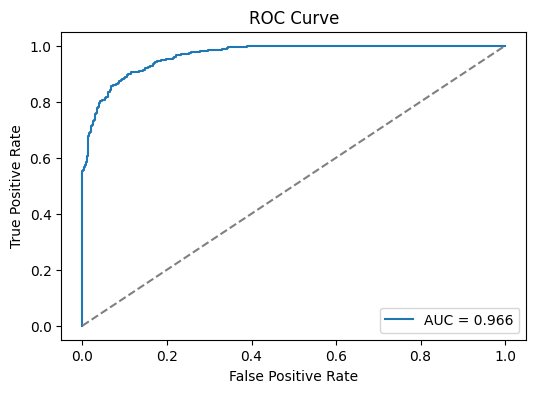

 ROC AUC Score: 0.966


In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print(" ROC AUC Score:", round(auc_score, 3))

In [14]:
param_grid = {
'classifier__C': [0.01, 0.1, 1, 10],
'classifier__solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(
model,
param_grid,
cv=5,
scoring='accuracy',
verbose=1,
n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("\n Grid Search Completed!")
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

 Grid Search Completed!
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
Best CV Accuracy: 0.8967499999999999



=== Final Model Evaluation ===
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       497
           1       0.88      0.91      0.89       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



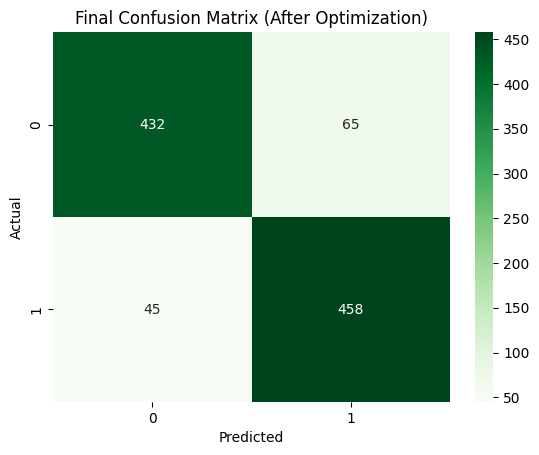

In [15]:
best_model = grid_search.best_estimator_
final_preds = best_model.predict(X_test)
print("\n=== Final Model Evaluation ===")
print(classification_report(y_test, final_preds))
final_cm = confusion_matrix(y_test, final_preds)
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Final Confusion Matrix (After Optimization)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()